# Mock Loan dataset by CTAB-GAN
### ***Introduction***
CTAB-GAN is a conditional GAN based tabular data generator. CTAB-GAN advances beyond the prior state-of-the-art methods by modeling mixed variables and provides strong generation capability for imbalanced categorical variables, and continuous variables with complex distributions. To such ends, the core features of CTAB-GAN include as follows:
- (i)introduction of the classifier into conditional GAN;    
- (ii) effective data encoding for mixed variable;    
- (iii) a novel construction of conditional vectors.        

Loan dataset is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.        
### ***Our work***   
We use CTAB-GAN to simulate Loan data and visualize real and fake data. See code, comments, and diagrams for details.             
### ***Reference:***
[1] Sunil Jacob (2024). Bank_Loan_modelling [Dataset]. Kaggle Repository. Available: https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling/data   
[2] Z. Zhao, A. Kunar, R. Birke, H. Van der Scheer, and L. Y. Chen, “CTAB-GAN+: Enhancing Tabular Data Synthesis,” Frontiers in big Data, vol. 6, p. 1296508, 2024.

***Time ： 2024/11/25 20:14***  
***Author ： Chuang Liu***  
***Email ：LIUC0316@126.COM***  
***File ：Loan_Mocking.ipynb***  
***Notebook ：Jupyter***   

In [1]:
# Importing the model
from model.ctabgan import CTABGAN
# Importing the evaluation metrics 
from model.eval.evaluation import get_utility_metrics,stat_sim,privacy_metrics
# Importing standard libraries
import numpy as np
import pandas as pd
import glob

In [2]:
# Specifying the replication number 
num_exp = 5 
# Specifying the name of the dataset used 
dataset = "Loan" 
# Specifying the path of the dataset used 
real_path = "Real_Datasets/Loan/Loan.csv" 
# Specifying the root directory for storing generated data
fake_file_root = "Fake_Datasets" 

In [4]:
# Initializing the synthesizer object and specifying input parameters
# Notice: If you have continuous variable, you do not need to explicitly assign it. It will be treated like 
# that by default
synthesizer =  CTABGAN(raw_csv_path = real_path,
                 test_ratio = 0.20,  
                 categorical_columns = ['Family', 'Education', 'CreditCard', 'Securities Account',
                                        'CD Account', 'Online', 'Personal Loan'], 
                 log_columns = ['CCAvg'],
                 mixed_columns= {'Mortgage':[0.0]}, 
                 integer_columns = ['Age', 'Experience', 'ZIP Code', 'Mortgage'],
                 problem_type= {"Classification": 'Personal Loan'},
                 epochs = 300) 
# Fitting the synthesizer to the training dataset and generating synthetic data
synthesizer.fit()
for i in range(num_exp):
    syn = synthesizer.generate_samples()
    syn.to_csv(fake_file_root+"/"+dataset+"/"+ dataset+"_fake_{exp}.csv".format(exp=i), index= False)

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [23:08<00:00,  4.63s/it]


Finished training in 1391.3518521785736  seconds.


In [5]:
# Collecting the paths to all corresponding generated datasets for evaluation 
fake_paths = glob.glob(fake_file_root+"/"+dataset+"/"+"*")

In [6]:
# Specifying the list of classifiers to conduct ML utility evaluation
classifiers_list = ["lr","dt","rf","mlp","svm"]

# Storing and presenting the results as a dataframe
result_mat = get_utility_metrics(real_path,fake_paths,"MinMax",classifiers_list, test_ratio = 0.20)
result_df  = pd.DataFrame(result_mat,columns=["Acc","AUC","F1_Score"])
result_df.index = classifiers_list
result_df

,Acc,AUC,F1_Score
lr,2.20,0.015526,0.084923
dt,12.82,0.249668,0.287895
rf,4.36,0.047884,0.155071
mlp,4.46,0.041183,0.160977
svm,4.24,0.056630,0.193703


In [7]:
# Specifying the categorical columns of the dataset used
adult_categorical = ['Family', 'Education', 'CreditCard', 'Securities Account',
                                        'CD Account', 'Online', 'Personal Loan']

# Storing and presenting the results as a dataframe
stat_res_avg = []
for fake_path in fake_paths:
    stat_res = stat_sim(real_path,fake_path,adult_categorical)
    stat_res_avg.append(stat_res)

stat_columns = ["Average WD (Continuous Columns","Average JSD (Categorical Columns)","Correlation Distance"]
stat_results = pd.DataFrame(np.array(stat_res_avg).mean(axis=0).reshape(1,3),columns=stat_columns)
stat_results

,Average WD (Continuous Columns,Average JSD (Categorical Columns),Correlation Distance
0,0.023684,0.050873,0.0


In [8]:
# Storing and presenting the results as a dataframe
priv_res_avg = []
for fake_path in fake_paths:
    priv_res = privacy_metrics(real_path,fake_path)
    priv_res_avg.append(priv_res)
    
privacy_columns = ["DCR between Real and Fake (5th perc)","DCR within Real(5th perc)","DCR within Fake (5th perc)","NNDR between Real and Fake (5th perc)","NNDR within Real (5th perc)","NNDR within Fake (5th perc)"]
privacy_results = pd.DataFrame(np.array(priv_res_avg).mean(axis=0).reshape(1,6),columns=privacy_columns)
privacy_results

,DCR between Real and Fake (5th perc),DCR within Real(5th perc),DCR within Fake (5th perc),NNDR between Real and Fake (5th perc),NNDR within Real (5th perc),NNDR within Fake (5th perc)
0,0.811169,0.603615,0.711646,0.597245,0.49235,0.536154


In [9]:
# Storing generated data for future use if needed
# syn.to_csv(fake_file_root+"/"+dataset+"/"+ dataset+"_fake_{exp}.csv".format(exp=i), index= False)

In [10]:
from table_evaluator import TableEvaluator

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   CreditCard          5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns)

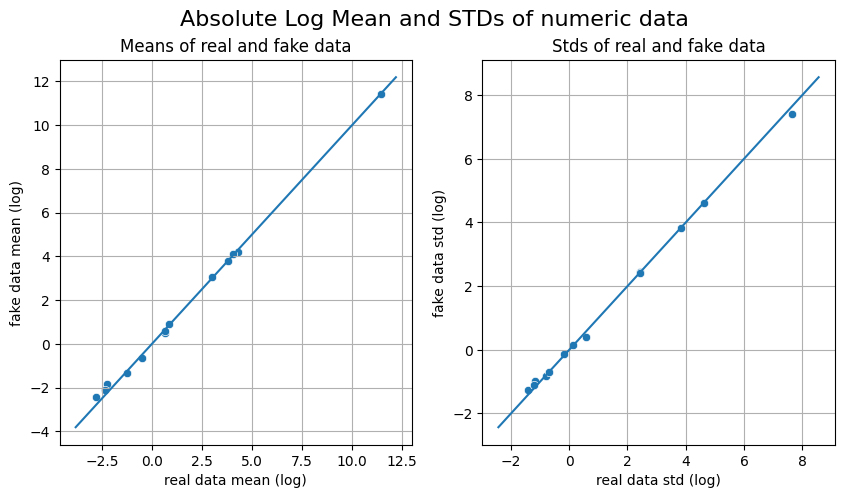

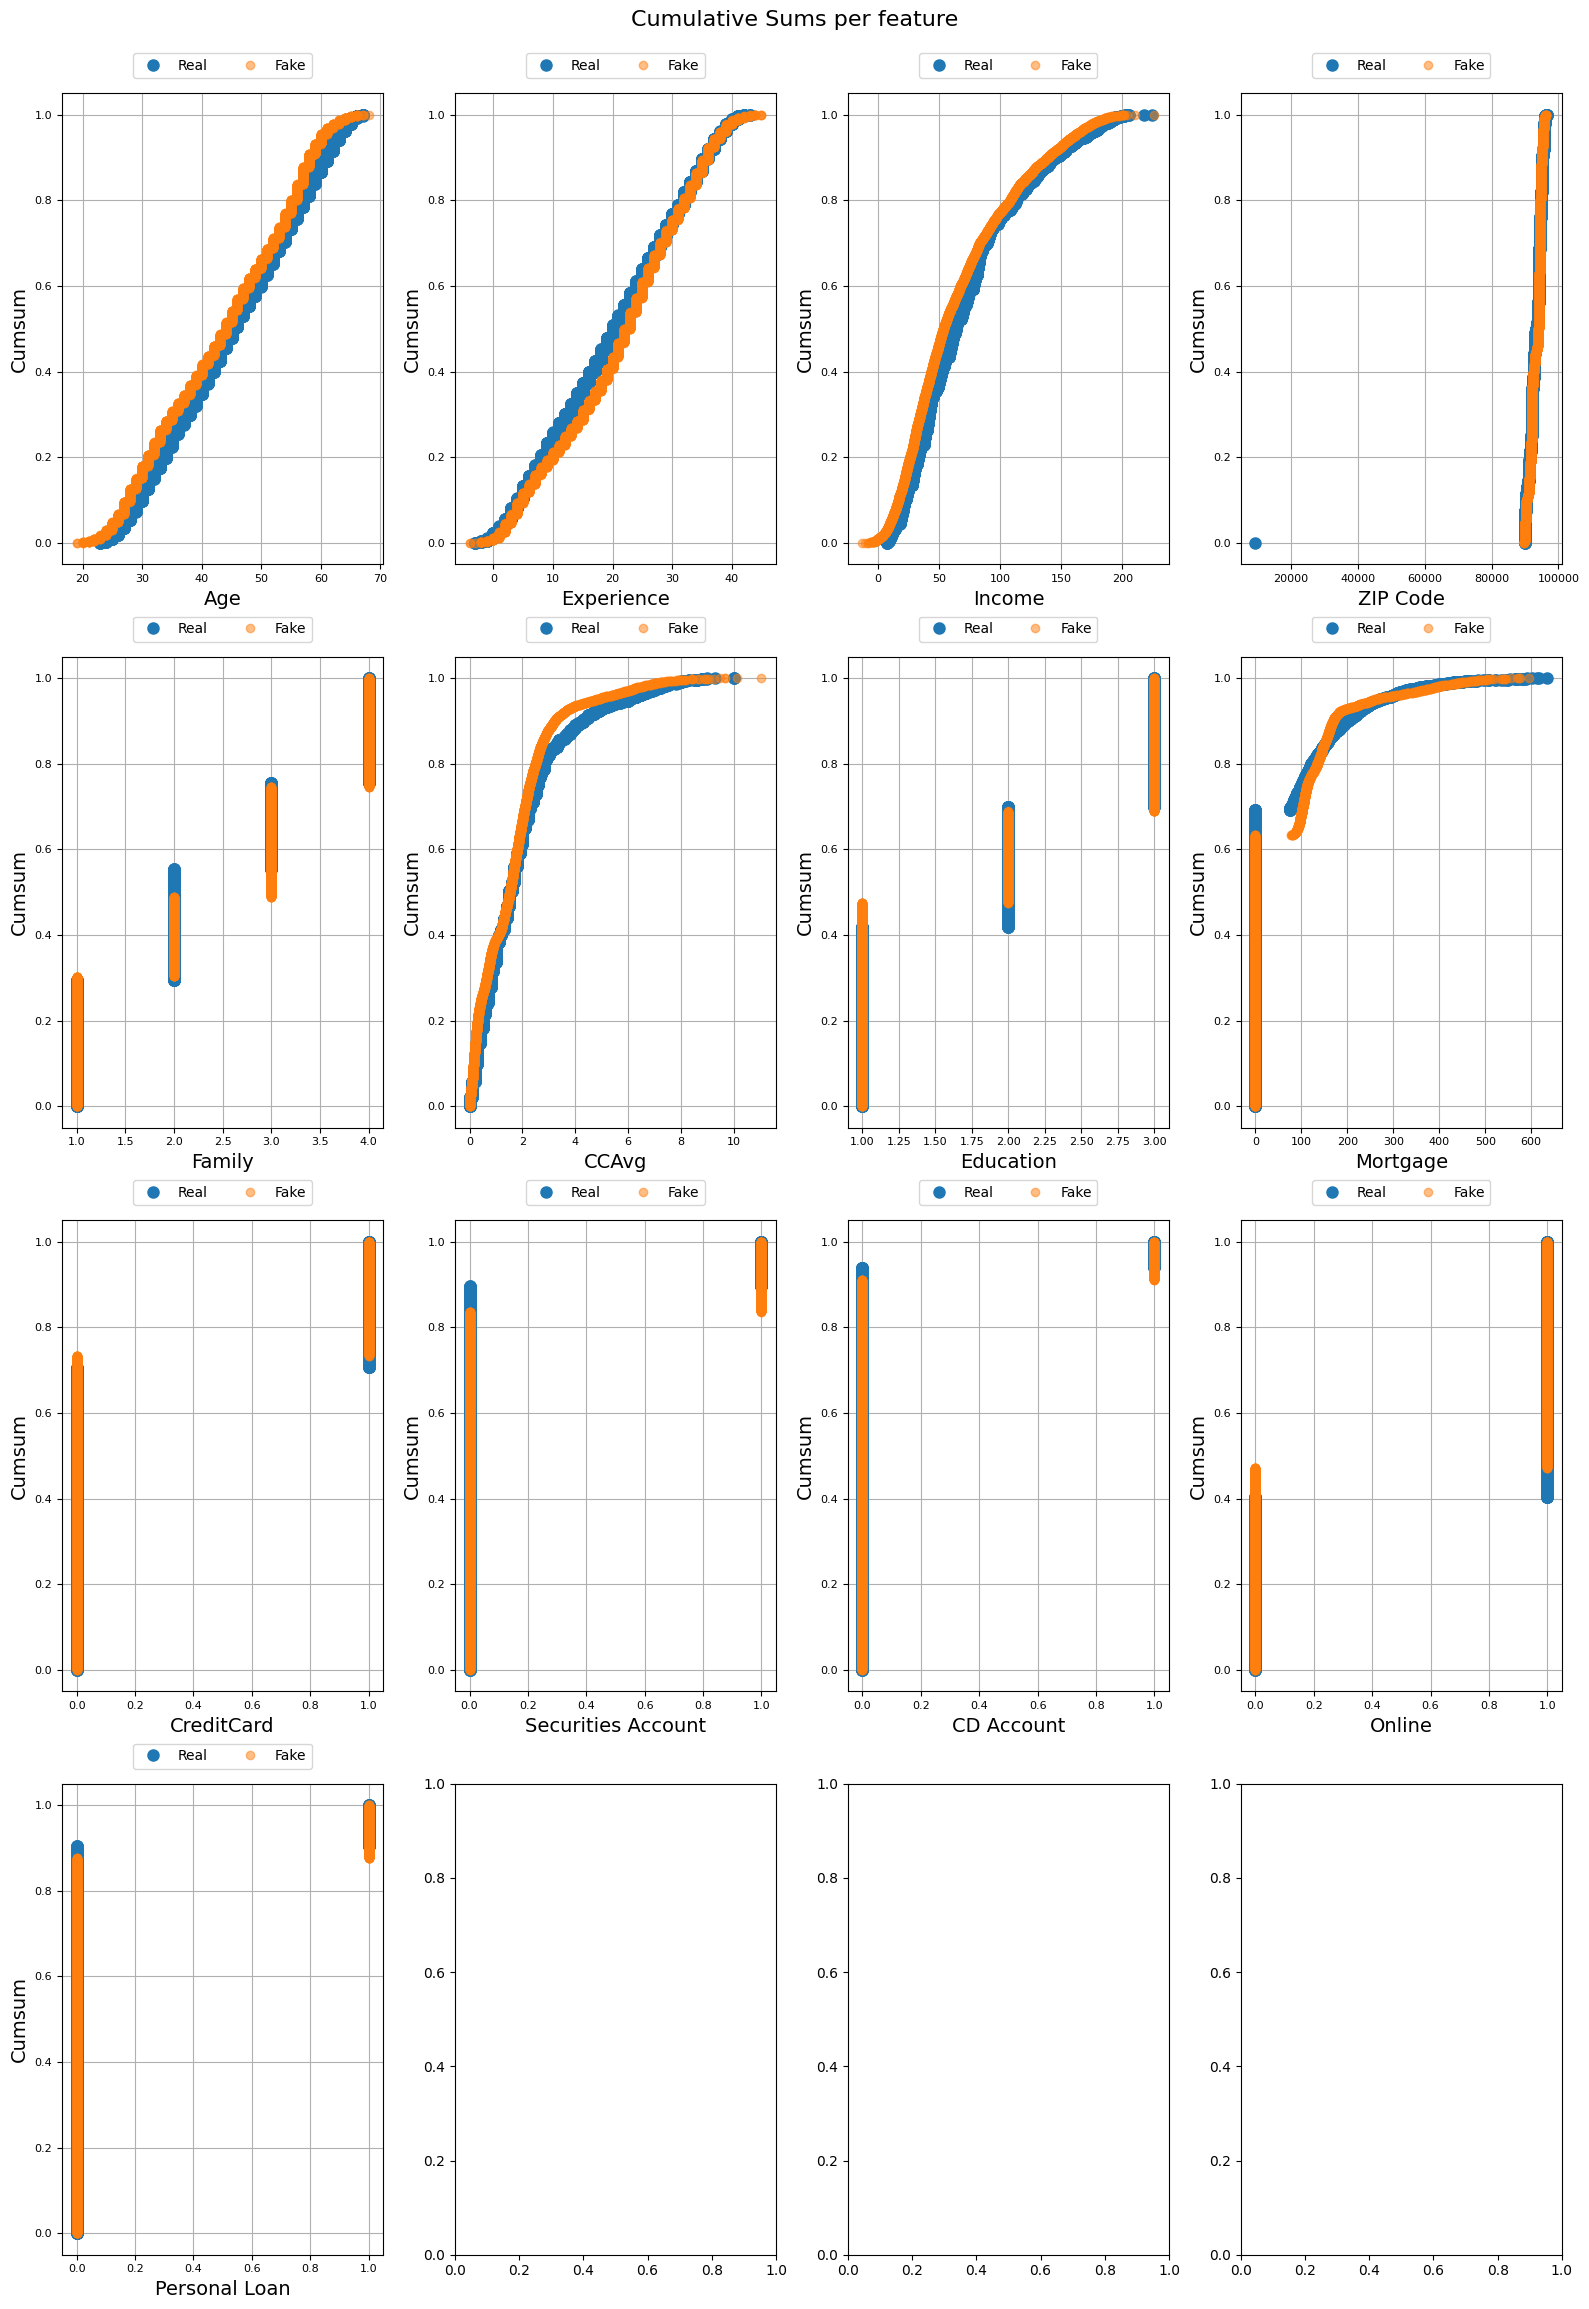

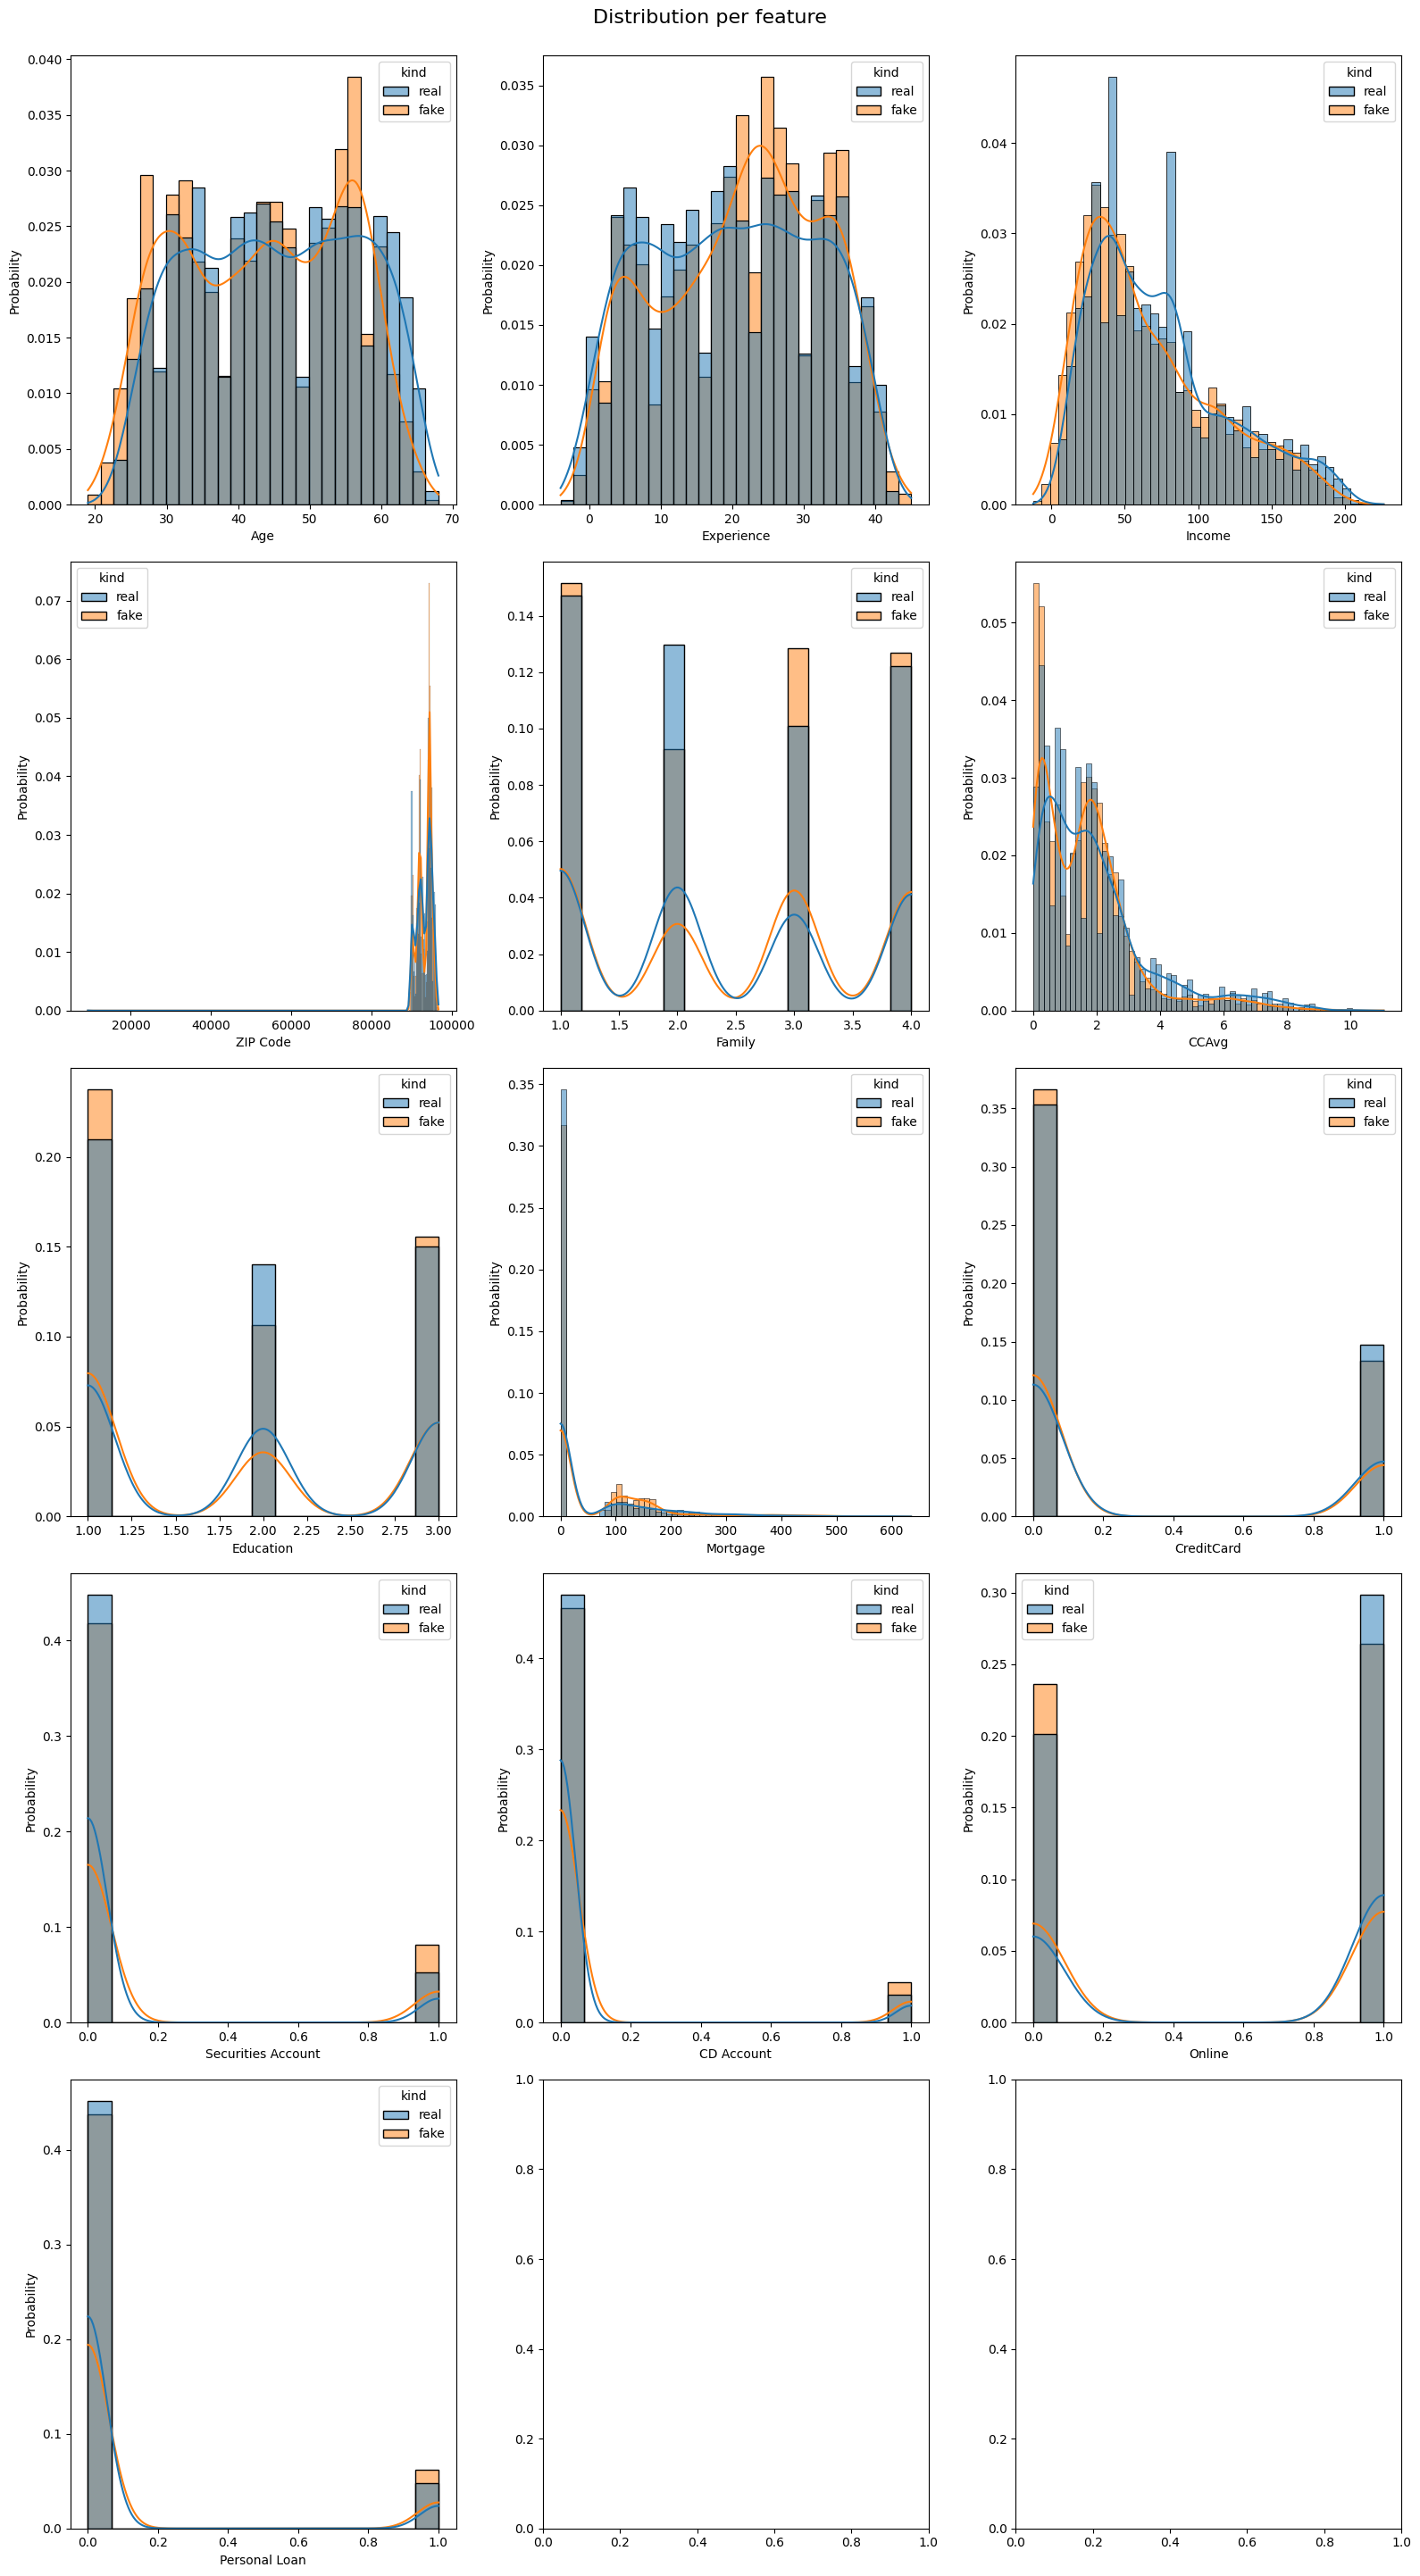

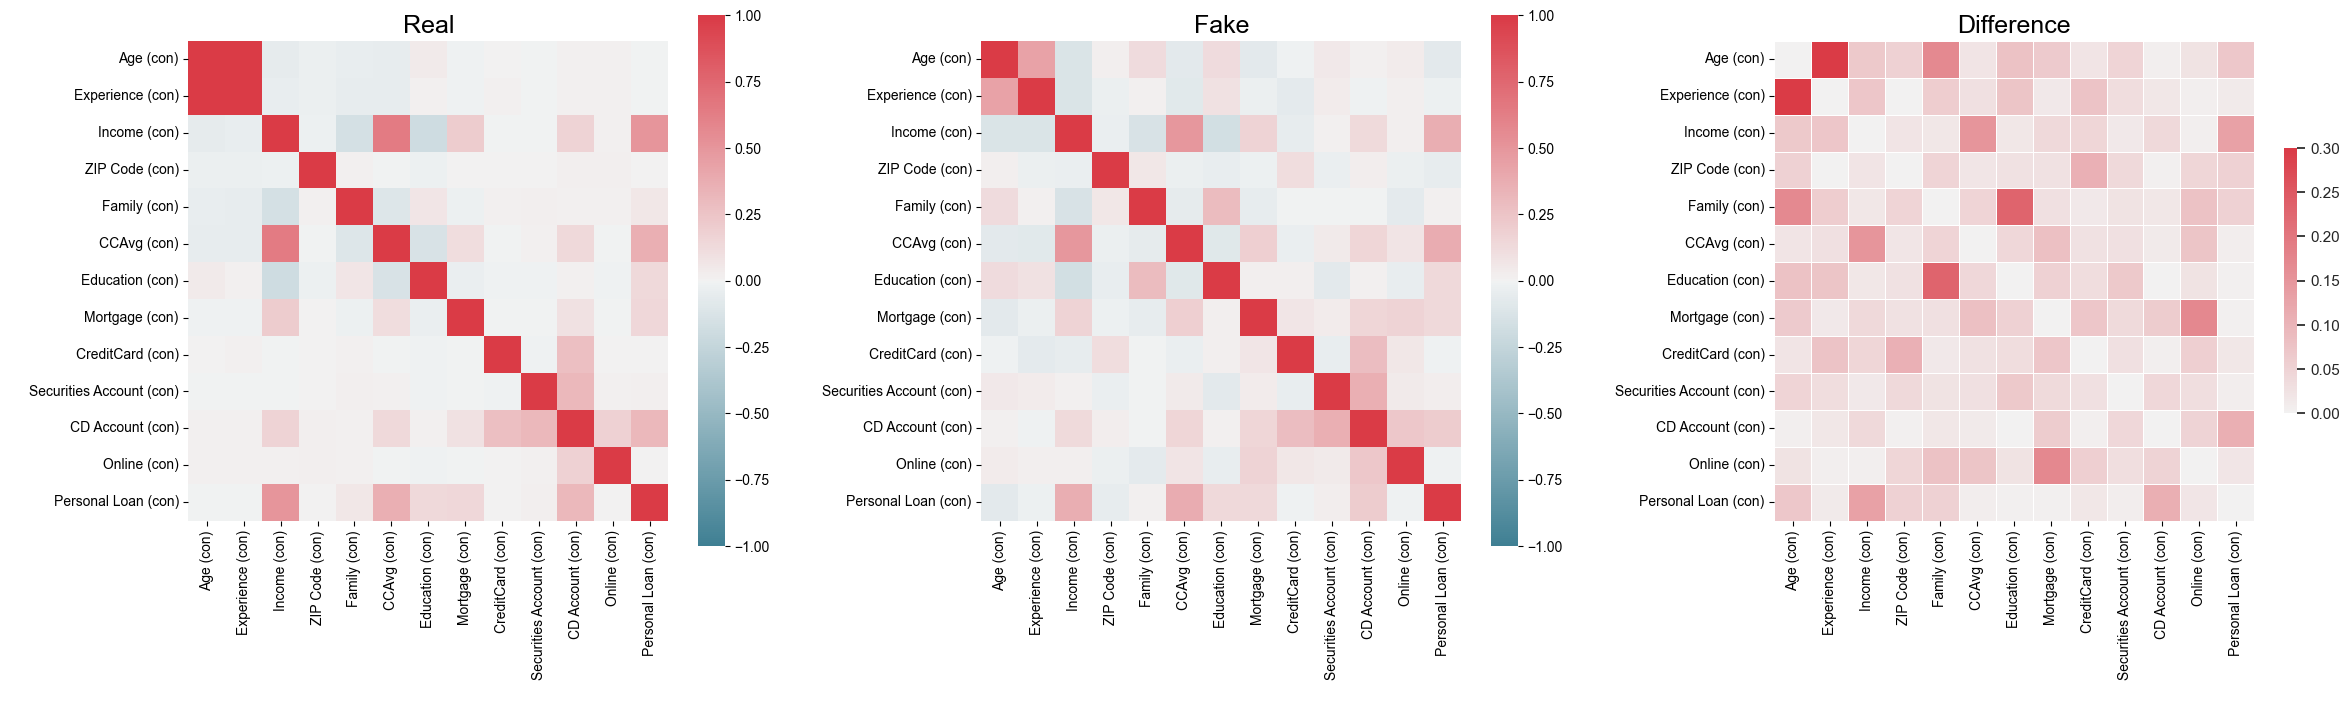

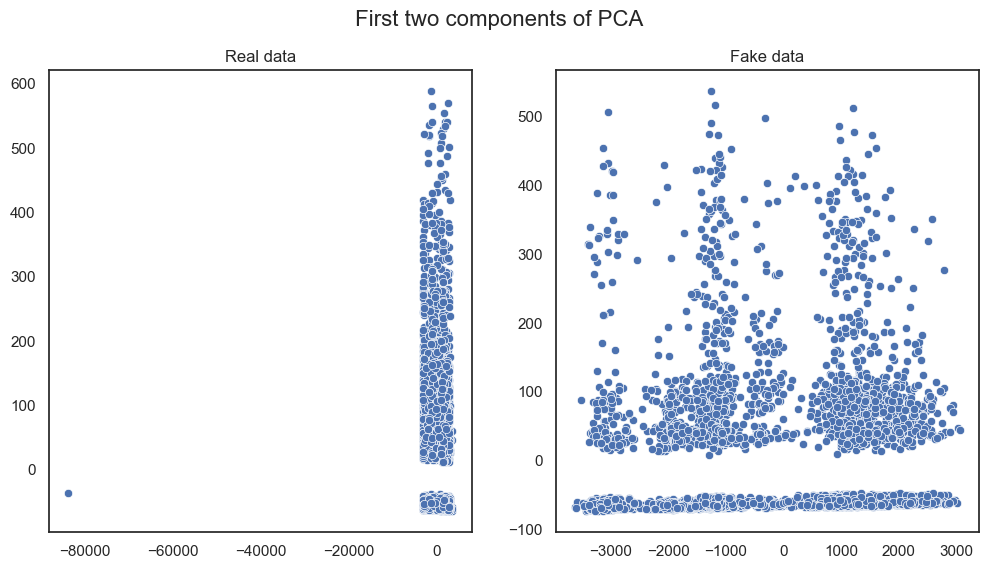

In [11]:
Real_Dataset = pd.read_csv('Real_Datasets/Loan/Loan.csv')
Fake_Dataset = pd.read_csv('Fake_Datasets/Loan/Loan_fake_0.csv')

Real_Dataset.head()
Real_Dataset.info()
Fake_Dataset.head()
Fake_Dataset.info()

print(Real_Dataset.shape, Fake_Dataset.shape)
table_evaluator = TableEvaluator(Real_Dataset, Fake_Dataset)

table_evaluator.visual_evaluation()